In [ ]:
!pip install onnxruntime
!pip install onnx
!pip install tf2onnx

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3108, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2901, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 242, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 441, in run
    conflicts = self._determine_conflicts(to_install)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import optimizers
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import (StandardScaler,PolynomialFeatures, OrdinalEncoder)
from sklearn.metrics import f1_score,recall_score,precision_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
data=pd.read_csv('/content/drive/MyDrive/DentalData 27.csv')

In [20]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Do the ulcers interfere with daily activities,280,0.754717
Is there bleeding from the ulcer,279,0.752022
Have you had similar ulcers?,279,0.752022
Is the ulcer painful,278,0.749326
Has the ulcer changed since first noticed?,278,0.749326
Is there a foul smell from the ulcer?,278,0.749326
Is there discharge from the ulcer?,278,0.749326
Is the swelling painful?,270,0.727763
"Does the swelling changes during normal activities such as eating, speaking, etc?",270,0.727763
Has the swelling changed since it was first noticed? If yes how quickly?,269,0.725067


In [21]:
data['Chief complaint']=data['Chief complaint'].str.replace('Ulecer','Ulcer')
correct_pulp={
    'Pulpits':'Pulpitis',
    'pulpits':'Pulpitis',
    'pulpitts':'Pulpitis',
    'pulpitis':'Pulpitis',
    'Periodontitis with grade two mobility':'Chronic Destructive Periodontitis',
    'Periodontitis with grade three mobility':'Chronic Destructive Periodontitis',
    'Periodontitis with grade one mobility':'Chronic Destructive Periodontitis',
    'Periodontitis with grade 1 mobility':'Chronic Destructive Periodontitis',
    'Periodontitis with grade 2 mobility':'Chronic Destructive Periodontitis',
    'Periodontitis with grade 3 mobility':'Chronic Destructive Periodontitis',
    'Periodontitis with mobility of tooth':'Chronic Destructive Periodontitis',
    'Periodontitis with grade 2 tooth mobility':'Chronic Destructive Periodontitis',
    'Gingivitis':'Acute gingivitis',
    'gingivitis':'Gingivitis'

}
for word, correct in correct_pulp.items():
    data['Final Diagnosis']=data['Final Diagnosis'].str.replace(word,correct)


28


<Axes: xlabel='count', ylabel='Final Diagnosis'>

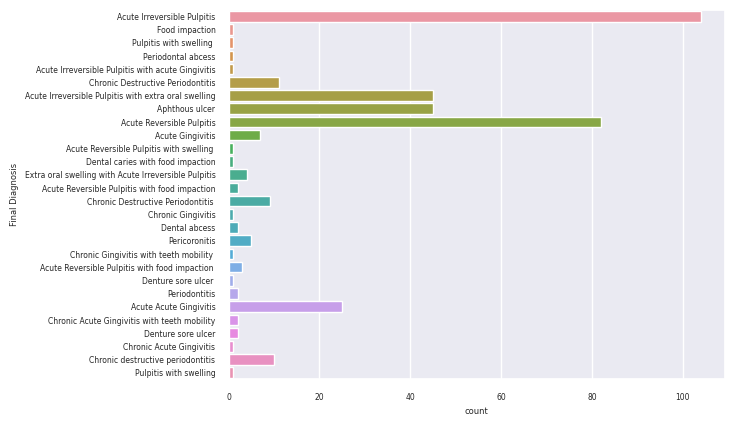

In [22]:
y_new = data['Final Diagnosis']
classes_new = y_new.unique()
print(len(classes_new))

sns.set(font_scale=0.5)
sns.countplot(y=y_new,label='Number of cases')
# data['Chief complaint'].fillna("swelling",inplace=True)
# data.fillna("No",inplace=True)
# print(data.isnull().sum())

<Axes: xlabel='count', ylabel='Final Diagnosis'>

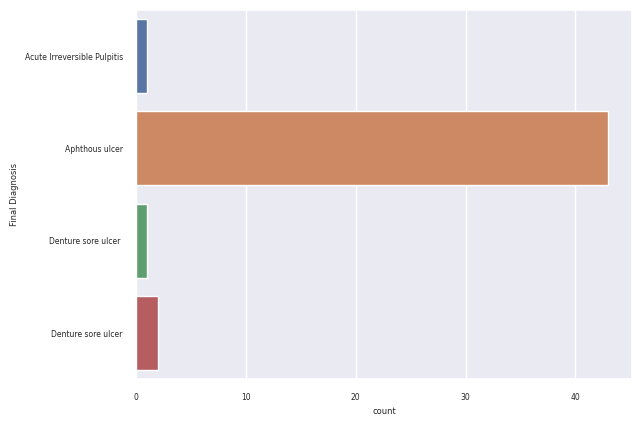

In [23]:
#seperating the ulcer diagnosis
ulcer_df=data[data["Chief complaint"] == "Ulcer"]
ulcer_df.head()
y_ulcer=ulcer_df['Final Diagnosis']
sns.set(font_scale=0.5)
sns.countplot(y=y_ulcer,label="Number of cases")

<Axes: xlabel='count', ylabel='Final Diagnosis'>

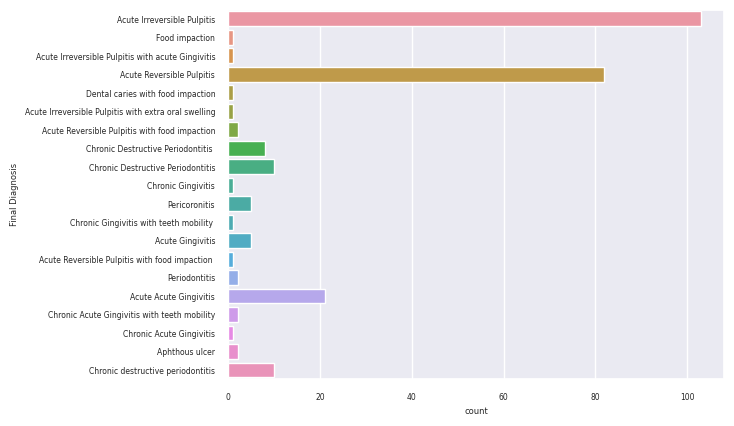

In [24]:
#seperating the pain diagnosis
pain_df=data[data["Chief complaint"] == "Pain"]
pain_df.head()
y_pain=pain_df['Final Diagnosis']
sns.set(font_scale=0.5)
sns.countplot(y=y_pain,label="Number of cases")

<Axes: xlabel='count', ylabel='Final Diagnosis'>

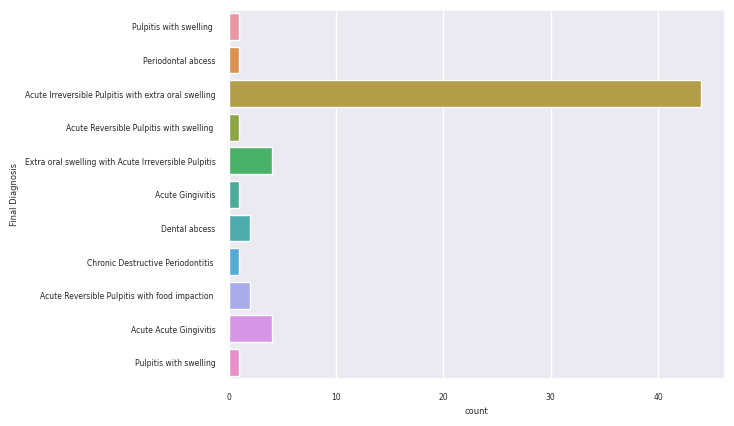

In [25]:
#seperating the swelling diagnosis
swelling_df=data[data["Chief complaint"] == "Swelling"]
swelling_df.head()
y_swelling=swelling_df['Final Diagnosis']
sns.set(font_scale=0.5)
sns.countplot(y=y_swelling,label="Number of cases")

In [ ]:
# filling in missing values and checking again
data['Chief complaint'].fillna("swelling",inplace=True)
data.fillna("No",inplace=True)
print(data.isnull().sum())
data.sample(10)


Timestamp                                                                            0
Patient Number                                                                       0
Chief complaint                                                                      0
Nature of Pain                                                                       0
Severity of pain                                                                     0
Onset  and mode of pain                                                              0
Factors which worsens the pain                                                       0
Is the swelling painful?                                                             0
Has the swelling changed since it was first noticed? If yes how quickly?             0
Does the swelling changes during normal activities such as eating, speaking, etc?    0
Is the ulcer painful                                                                 0
Is there bleeding from the ulcer           

,Timestamp,Patient Number,Chief complaint,Nature of Pain,Severity of pain,Onset and mode of pain,Factors which worsens the pain,Is the swelling painful?,Has the swelling changed since it was first noticed? If yes how quickly?,"Does the swelling changes during normal activities such as eating, speaking, etc?",...,Is there bleeding from the ulcer,Is there discharge from the ulcer?,Is there a foul smell from the ulcer?,Do the ulcers interfere with daily activities,Has the ulcer changed since first noticed?,Have you had similar ulcers?,Final Diagnosis,Is there bleeding in the gums?,Is there pain in the gums,"If any tooth/teeth is/are mobile, what is the degree of mobility"
102,07/11/2023 10:34:47,M52,Swelling,stabbing,No,The pain came suddenly,Eating,No,Slow,No,...,No,No,No,No,No,No,Acute Irreversible Pulpitis with extra oral sw...,No,No,No
286,22/11/2023 11:28:35,F32,Pain,throbbing,Moderate,lingering pain,Eating,No,No,No,...,No,No,No,No,No,No,Acute Irreversible Pulpitis,No,No,No
324,24/11/2023 10:33:08,M34,Pain,throbbing,Mild,lingering pain,Cold foods or drinks,No,No,No,...,No,No,No,No,No,No,Acute Reversible Pulpitis,No,No,No
158,11/11/2023 10:03:55,F40,Pain,throbbing,Moderate,The pain came suddenly,Hot foods or drinks,No,No,No,...,No,No,No,No,No,No,Acute Irreversible Pulpitis,No,No,No
26,03/11/2023 10:47:32,F15,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,Acute Gingivitis,Yes,Yes,No
278,22/11/2023 09:34:09,M2,Ulcer,burning,Moderate,lingering pain,No,No,No,No,...,No,No,No,No,No,No,Aphthous ulcer,No,No,No
298,23/11/2023 10:45:16,F70,Swelling,stabbing,Mild,lingering pain,Eating,Yes,Slow,No,...,No,No,No,No,No,No,Acute Irreversible Pulpitis with extra oral sw...,No,No,No
131,10/11/2023 08:51:33,F6,Swelling,throbbing,Moderate,The pain came suddenly,Hot foods or drinks,No,Slow,No,...,No,No,No,No,No,No,Acute Irreversible Pulpitis with extra oral sw...,No,No,No
140,10/11/2023 11:13:24,F35,Pain,throbbing,Mild,The pain came suddenly,Cold foods or drinks,No,No,No,...,No,No,No,No,No,No,Acute Reversible Pulpitis,No,No,No
168,14/11/2023 09:38:45,M70,Pain,stabbing,Mild,lingering pain,No,No,No,No,...,No,No,No,No,No,No,Acute Acute Gingivitis,No,Yes,No


In [ ]:
#Dropping unnecessary fields
data.drop('Timestamp',axis=1, inplace=True)
data.drop('Patient Number',axis=1, inplace=True)

In [ ]:
# #using ordinal encoder to change the fields to numerical values
encode=OrdinalEncoder(dtype=float)
patient_encode=pd.DataFrame(encode.fit_transform(data),columns=data.columns)

In [ ]:
train,test=train_test_split(patient_encode,test_size=0.2, random_state=42)
print(len(train))
print(len(test))

296
75


In [ ]:
X_train = train.drop(columns=['Final Diagnosis'])
y_train = train['Final Diagnosis']


X_test = test.drop(columns=['Final Diagnosis'])
y_test = test['Final Diagnosis']

In [ ]:
y_train.shape

(296,)

In [ ]:
model = tf.keras.Sequential([
keras.layers.Dense(128 , activation='relu' , input_shape=[18]),
keras.layers.Dense(64 , activation='relu') ,
keras.layers.Dense(28, activation="softmax") ])


SyntaxError: ignored

In [ ]:
model.compile(optimizer='adam' , loss='mse' , metrics=['mse','mae','accuracy'],)

In [ ]:
history=model.fit( X_train,y_train ,epochs = 20,verbose=1,)

Epoch 1/20
10/10 [==============================] - 1s 13ms/step - loss: 40.6348 - mse: 40.6348 - mae: 4.4652 - accuracy: 0.0338
Epoch 2/20
10/10 [==============================] - 0s 14ms/step - loss: 29.1449 - mse: 29.1449 - mae: 3.8499 - accuracy: 0.0203
Epoch 3/20
10/10 [==============================] - 0s 13ms/step - loss: 25.8036 - mse: 25.8036 - mae: 3.2121 - accuracy: 0.0203
Epoch 4/20
10/10 [==============================] - 0s 12ms/step - loss: 23.6250 - mse: 23.6250 - mae: 3.1398 - accuracy: 0.0203
Epoch 5/20
10/10 [==============================] - 0s 13ms/step - loss: 20.5993 - mse: 20.5993 - mae: 2.7199 - accuracy: 0.0203
Epoch 6/20
10/10 [==============================] - 0s 12ms/step - loss: 19.3065 - mse: 19.3065 - mae: 2.6380 - accuracy: 0.0203
Epoch 7/20
10/10 [==============================] - 0s 12ms/step - loss: 18.6903 - mse: 18.6903 - mae: 2.5220 - accuracy: 0.0203
Epoch 8/20
10/10 [==============================] - 0s 14ms/step - loss: 17.8414 - mse: 17.8414 -

In [ ]:
model.evaluate(X_test,y_test)

3/3 [==============================] - 0s 9ms/step - loss: 13.8530 - mse: 13.8530 - mae: 2.2363 - accuracy: 0.0000e+00


[13.852980613708496, 13.852980613708496, 2.236255168914795, 0.0]

In [ ]:
model.save('DentNNv3.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import onnx
import tf2onnx
onnx_model,_=tf2onnx.convert.from_keras(model)
onnx.save(onnx_model,"DentAIv3.onnx")